## Importar Librerías

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

## Cargar el Dataset

In [35]:
df = pd.read_csv('C:/Users/mitev/Desktop/Prácticas/tuberculosis_proyect/dataset/tuberculosis_xray_dataset.csv')

# EDA

In [36]:
df.head()

,Patient_ID,Age,Gender,Chest_Pain,Cough_Severity,Breathlessness,Fatigue,Weight_Loss,Fever,Night_Sweats,Sputum_Production,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class
0,PID000001,69,Male,Yes,1,2,3,2.37,Moderate,Yes,Medium,Yes,Former,Yes,Normal
1,PID000002,32,Female,Yes,3,0,9,6.09,Moderate,No,Medium,No,Current,Yes,Normal
2,PID000003,89,Male,No,7,0,3,2.86,Mild,Yes,Medium,No,Current,No,Tuberculosis
3,PID000004,78,Female,Yes,2,0,6,4.57,Moderate,No,High,Yes,Never,Yes,Tuberculosis
4,PID000005,38,Male,No,7,2,5,13.86,High,Yes,Low,No,Never,Yes,Tuberculosis


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  object 
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Chest_Pain           20000 non-null  object 
 4   Cough_Severity       20000 non-null  int64  
 5   Breathlessness       20000 non-null  int64  
 6   Fatigue              20000 non-null  int64  
 7   Weight_Loss          20000 non-null  float64
 8   Fever                20000 non-null  object 
 9   Night_Sweats         20000 non-null  object 
 10  Sputum_Production    20000 non-null  object 
 11  Blood_in_Sputum      20000 non-null  object 
 12  Smoking_History      20000 non-null  object 
 13  Previous_TB_History  20000 non-null  object 
 14  Class                20000 non-null  object 
dtypes: float64(1), int64(4), object(10)


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,53.467450,20.773984,18.0,35.00,53.00,71.0,89.0
Cough_Severity,20000.0,4.491350,2.864723,0.0,2.00,4.00,7.0,9.0
Breathlessness,20000.0,2.003450,1.417123,0.0,1.00,2.00,3.0,4.0
Fatigue,20000.0,4.508450,2.881552,0.0,2.00,5.00,7.0,9.0
Weight_Loss,20000.0,7.455281,4.339864,0.0,3.64,7.49,11.2,15.0


In [39]:
df.describe(include=['object']).T

,count,unique,top,freq
Patient_ID,20000,20000,PID019984,1
Gender,20000,2,Male,10171
Chest_Pain,20000,2,No,10205
Fever,20000,3,Moderate,6713
Night_Sweats,20000,2,No,10044
Sputum_Production,20000,3,Medium,6709
Blood_in_Sputum,20000,2,No,10075
Smoking_History,20000,3,Former,6791
Previous_TB_History,20000,2,Yes,10067
Class,20000,2,Normal,14082


In [40]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Chest_Pain             0
Cough_Severity         0
Breathlessness         0
Fatigue                0
Weight_Loss            0
Fever                  0
Night_Sweats           0
Sputum_Production      0
Blood_in_Sputum        0
Smoking_History        0
Previous_TB_History    0
Class                  0
dtype: int64

In [41]:
# Promedios de síntomas por clase
df.groupby("Class")[["Age", "Cough_Severity", "Breathlessness", "Fatigue", "Weight_Loss"]].mean()

,Age,Cough_Severity,Breathlessness,Fatigue,Weight_Loss
Class,,,,,
Normal,53.403352,4.489277,1.999432,4.523860,7.450925
Tuberculosis,53.619973,4.496283,2.013011,4.471781,7.465644


In [42]:
# Conteo de casos por género y clase
df.groupby(["Gender", "Class"]).size().unstack()

Class,Normal,Tuberculosis
Gender,,
Female,6877,2952
Male,7205,2966


In [43]:
# Distribución de clase según tabaquismo
df.groupby(["Smoking_History", "Class"]).size().unstack()

Class,Normal,Tuberculosis
Smoking_History,,
Current,4674,1919
Former,4751,2040
Never,4657,1959


In [44]:
# Promedios de síntomas según tabaquismo
df.groupby("Smoking_History")[["Cough_Severity", "Breathlessness", "Fatigue"]].mean()

,Cough_Severity,Breathlessness,Fatigue
Smoking_History,,,
Current,4.502654,1.989989,4.496436
Former,4.474157,2.026506,4.500368
Never,4.497733,1.993198,4.528718


In [45]:
# Relación entre síntomas y clase (por ejemplo, dolor en el pecho)
symptoms = ["Chest_Pain", "Fever", "Night_Sweats", "Blood_in_Sputum"]

for symptom in symptoms:
    print(f"\n--- {symptom} ---")
    print(df.groupby([symptom, "Class"]).size().unstack())


--- Chest_Pain ---
Class       Normal  Tuberculosis
Chest_Pain                      
No            7232          2973
Yes           6850          2945

--- Fever ---
Class     Normal  Tuberculosis
Fever                         
High        4624          1962
Mild        4663          2038
Moderate    4795          1918

--- Night_Sweats ---
Class         Normal  Tuberculosis
Night_Sweats                      
No              7097          2947
Yes             6985          2971

--- Blood_in_Sputum ---
Class            Normal  Tuberculosis
Blood_in_Sputum                      
No                 7080          2995
Yes                7002          2923


In [46]:
# Relación entre historial previo y diagnóstico actual
df.groupby(["Previous_TB_History", "Class"]).size().unstack()

Class,Normal,Tuberculosis
Previous_TB_History,,
No,6991,2942
Yes,7091,2976


In [47]:
df['Fever'].value_counts()

Fever
Moderate    6713
Mild        6701
High        6586
Name: count, dtype: int64

In [48]:
df['Smoking_History'].value_counts()

Smoking_History
Former     6791
Never      6616
Current    6593
Name: count, dtype: int64

In [49]:
df['Age'].value_counts()

Age
34    331
32    318
65    313
38    309
30    306
     ... 
58    254
52    252
22    252
60    249
28    233
Name: count, Length: 72, dtype: int64

In [50]:
df[df.duplicated()]

,Patient_ID,Age,Gender,Chest_Pain,Cough_Severity,Breathlessness,Fatigue,Weight_Loss,Fever,Night_Sweats,Sputum_Production,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class


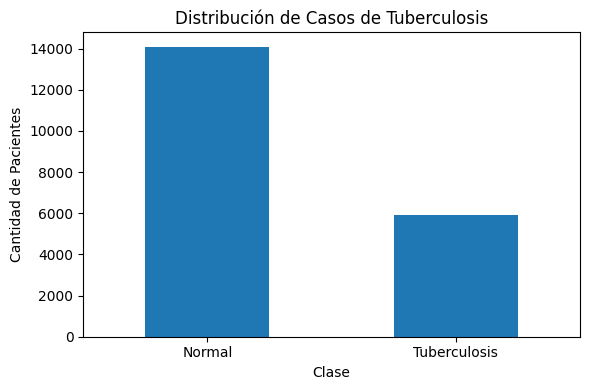

In [51]:
plt.style.use('default')

# Clase: Normal o Tuberculosis
plt.figure(figsize=(6, 4))
df['Class'].value_counts().plot(kind='bar')
plt.title('Distribución de Casos de Tuberculosis')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Pacientes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

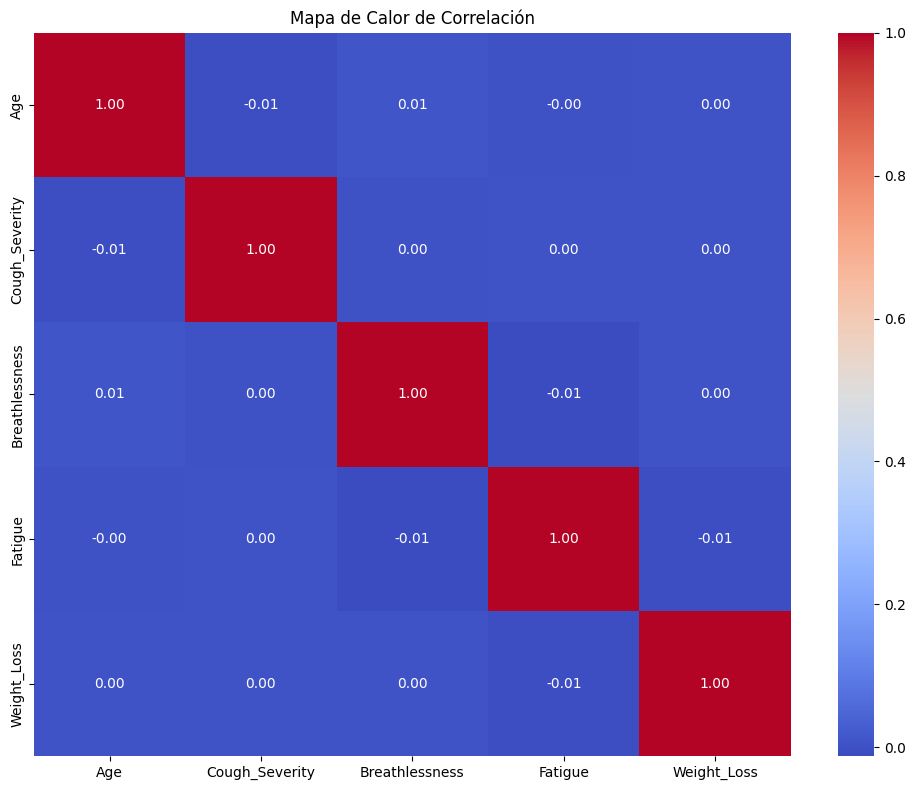

In [52]:
# Mapa de Correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.tight_layout()
plt.show()

## Data Preprocessing

In [53]:
df.select_dtypes('object').head()

,Patient_ID,Gender,Chest_Pain,Fever,Night_Sweats,Sputum_Production,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class
0,PID000001,Male,Yes,Moderate,Yes,Medium,Yes,Former,Yes,Normal
1,PID000002,Female,Yes,Moderate,No,Medium,No,Current,Yes,Normal
2,PID000003,Male,No,Mild,Yes,Medium,No,Current,No,Tuberculosis
3,PID000004,Female,Yes,Moderate,No,High,Yes,Never,Yes,Tuberculosis
4,PID000005,Male,No,High,Yes,Low,No,Never,Yes,Tuberculosis


In [54]:
df=df.drop(['Patient_ID'],axis=1)
df.head()

,Age,Gender,Chest_Pain,Cough_Severity,Breathlessness,Fatigue,Weight_Loss,Fever,Night_Sweats,Sputum_Production,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class
0,69,Male,Yes,1,2,3,2.37,Moderate,Yes,Medium,Yes,Former,Yes,Normal
1,32,Female,Yes,3,0,9,6.09,Moderate,No,Medium,No,Current,Yes,Normal
2,89,Male,No,7,0,3,2.86,Mild,Yes,Medium,No,Current,No,Tuberculosis
3,78,Female,Yes,2,0,6,4.57,Moderate,No,High,Yes,Never,Yes,Tuberculosis
4,38,Male,No,7,2,5,13.86,High,Yes,Low,No,Never,Yes,Tuberculosis


In [55]:
label_features = ["Gender", "Smoking_History", "Previous_TB_History", "Class","Chest_Pain","Night_Sweats","Blood_in_Sputum"]
for col in label_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [56]:
ordinal_features = [["Fever", "Sputum_Production"]]
for col in ordinal_features:
    ol = OrdinalEncoder()
    df[col] = ol.fit_transform(df[col])

In [57]:
df.head()

,Age,Gender,Chest_Pain,Cough_Severity,Breathlessness,Fatigue,Weight_Loss,Fever,Night_Sweats,Sputum_Production,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class
0,69,1,1,1,2,3,2.37,2.0,1,2.0,1,1,1,0
1,32,0,1,3,0,9,6.09,2.0,0,2.0,0,0,1,0
2,89,1,0,7,0,3,2.86,1.0,1,2.0,0,0,0,1
3,78,0,1,2,0,6,4.57,2.0,0,0.0,1,2,1,1
4,38,1,0,7,2,5,13.86,0.0,1,1.0,0,2,1,1


# Modelling

In [58]:
x=df.drop('Class',axis=1)
y=df['Class']

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),  
    'NaiveBayes': GaussianNB(),
}

In [61]:
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}


for i in models:
    obj = models[i]
    obj.fit(x_train, y_train)
    obj_pred = obj.predict(x_test)

 
    accuracy = accuracy_score(y_test, obj_pred>0.5,)
    precision = precision_score(y_test, obj_pred>0.5,average='weighted')
    recall = recall_score(y_test, obj_pred>0.5,average='weighted')
    f1 = f1_score(y_test, obj_pred>0.5,average='weighted')

  
    results['Model'].append(i)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)


results_df = pd.DataFrame(results)


print(results_df)

                Model  Accuracy  Precision   Recall  F1-Score
0  LogisticRegression   0.69650   0.485112  0.69650  0.571898
1        DecisionTree   0.55925   0.565396  0.55925  0.562212
2        RandomForest   0.69250   0.555560  0.69250  0.573111
3                 KNN   0.62975   0.568377  0.62975  0.587091
4                 SVM   0.69650   0.485112  0.69650  0.571898
5          NaiveBayes   0.69650   0.485112  0.69650  0.571898
